## Импорт сторонних библиотек

In [86]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import pickle

## 1. *Загрузка данных*

In [2]:
df = pd.read_csv('df_out.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


## 2. *Data Preparation*

### EDA

#### Удаление дубликатов, пропусков и неинформативных данных

In [3]:
df.shape

(10000, 20)

In [4]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
df[df.duplicated()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date


In [6]:
print('Информация о выборке:\n')
df.info()

Информация о выборке:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_d

<Axes: >

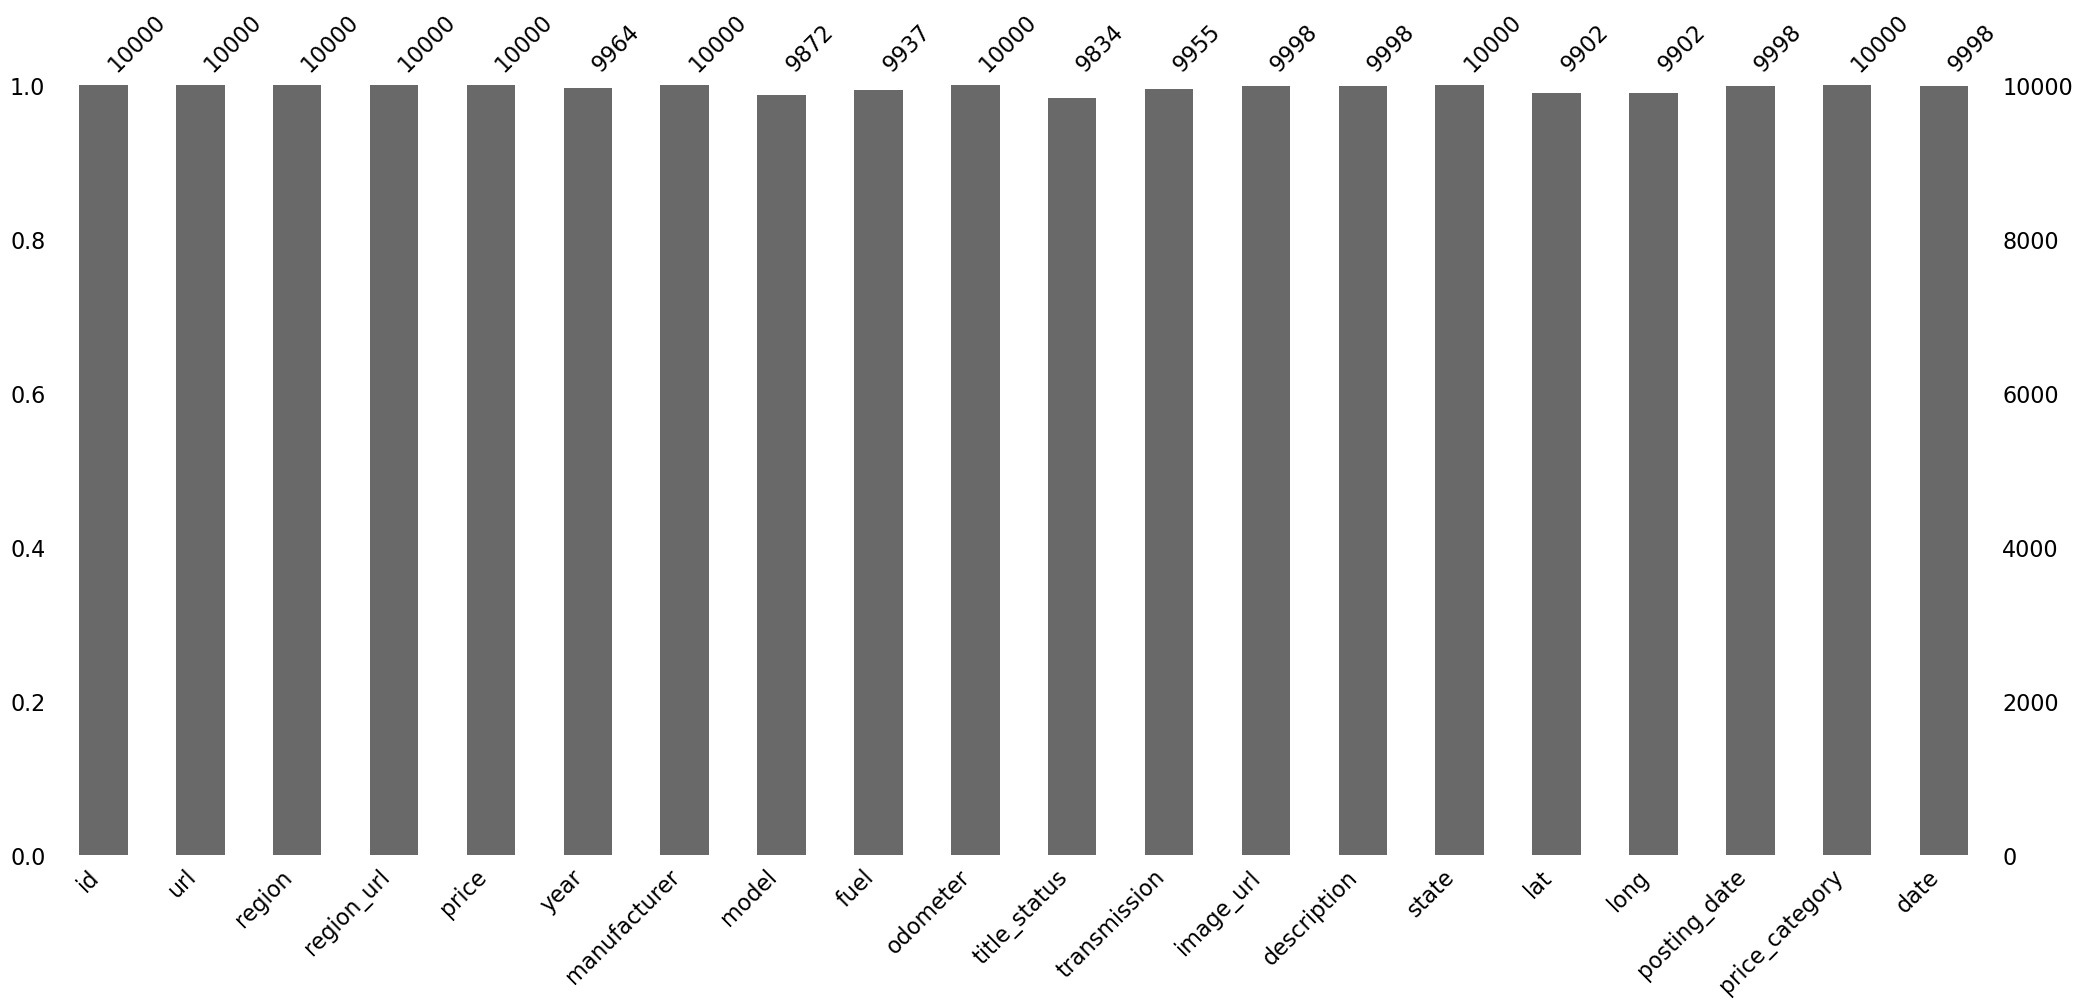

In [7]:
msno.bar(df)

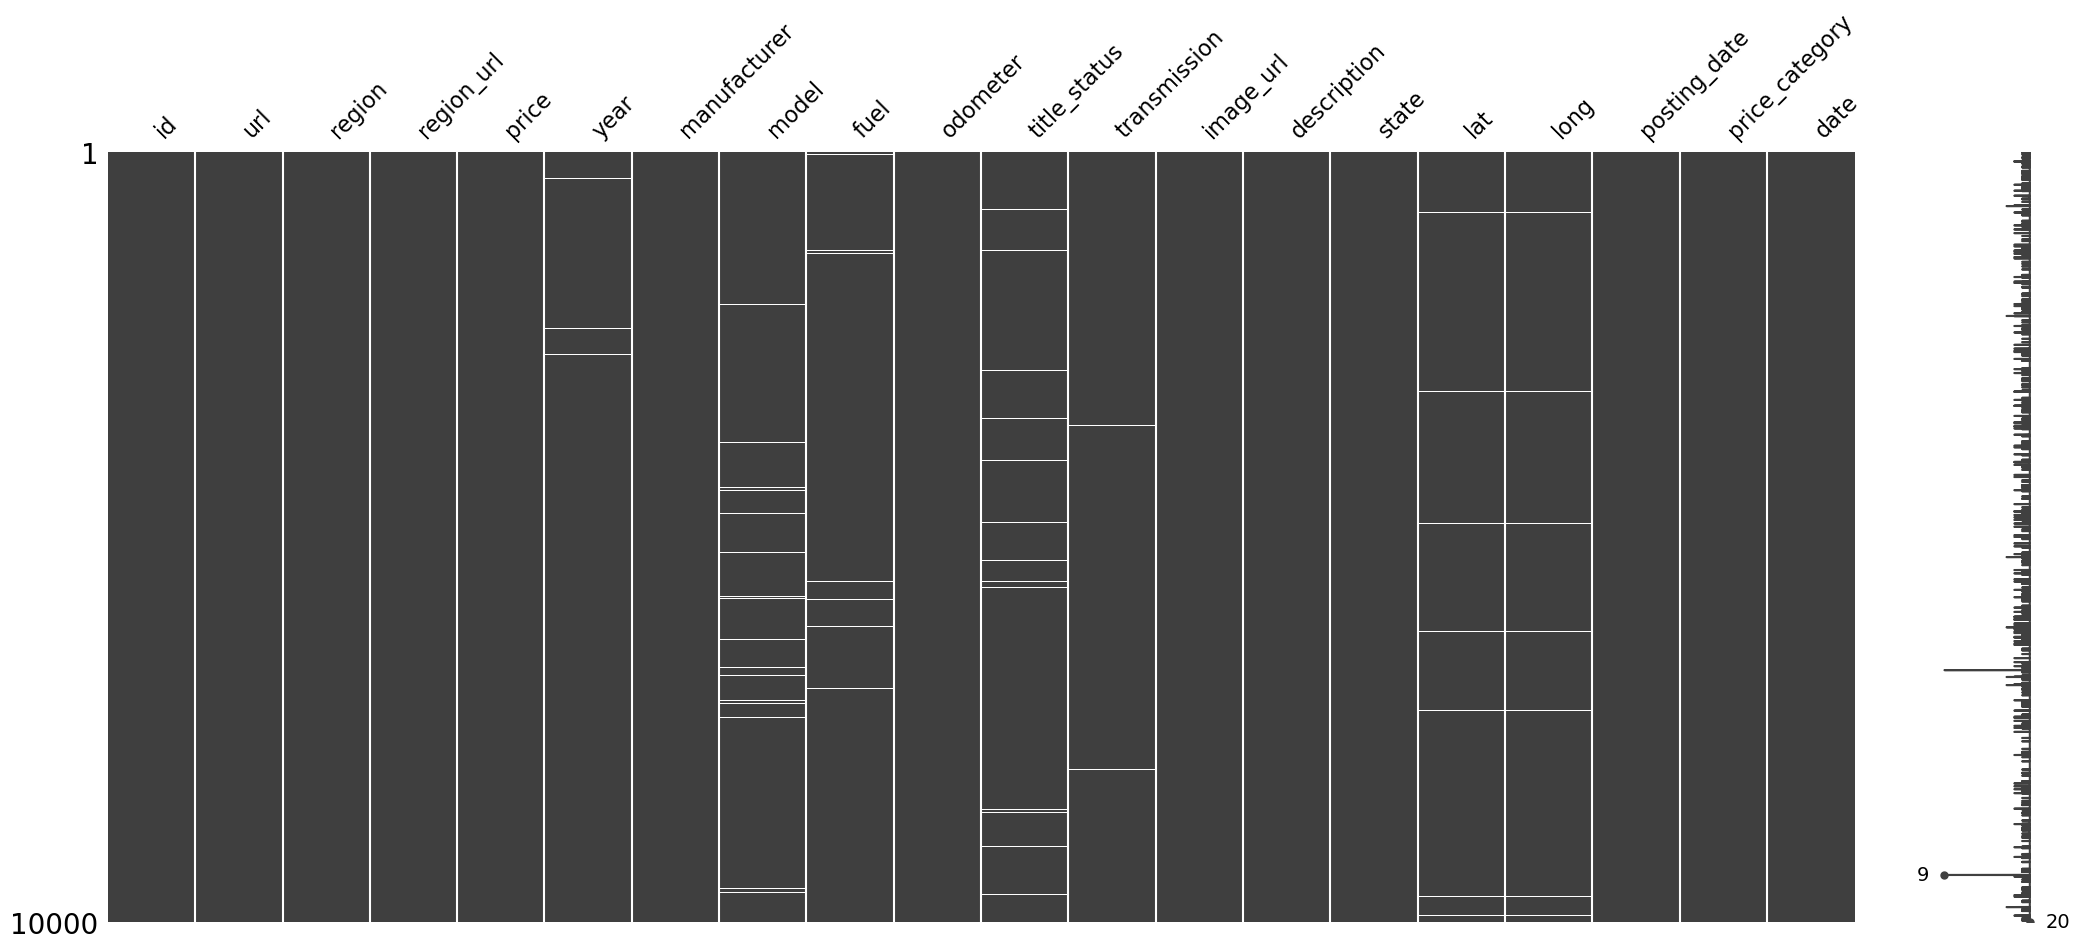

In [8]:
msno.matrix(df);

In [9]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений: ')
missing_values

Процент пропущенных значений: 


id                0.00
state             0.00
price_category    0.00
manufacturer      0.00
odometer          0.00
region_url        0.00
region            0.00
url               0.00
price             0.00
image_url         0.02
description       0.02
posting_date      0.02
date              0.02
year              0.36
transmission      0.45
fuel              0.63
lat               0.98
long              0.98
model             1.28
title_status      1.66
dtype: float64

In [10]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', round(len(df.dropna()) / len(df) * 100, 2))

In [11]:
print_useful_rows_info(df)

Количество полностью заполненных объектов из всей выборки: 9507
Процент полностью заполненных объектов из всей выборки: 95.07


In [12]:
df_clean = df.copy()

In [13]:
df_clean.title_status = df_clean.title_status.fillna('other')
df_clean.transmission = df_clean.transmission.fillna('other')
df_clean.fuel  = df_clean.fuel .fillna('other')
df_clean.description  = df_clean.description .fillna('other')
df_clean.model  = df_clean.model .fillna('other')

In [14]:
print(df_clean.title_status.isna().sum())
print(df_clean.transmission.isna().sum())
print(df_clean.fuel.isna().sum())
print(df_clean.description.isna().sum())
print(df_clean.model.isna().sum())

0
0
0
0
0


In [15]:
print(int(df_clean.year.mean()))
print(int(df_clean.long.mean()))
print(int(df_clean.lat.mean()))

2010
-94
38


In [16]:
df_clean.year = df_clean.year.fillna(int(df_clean.year.mean()))
df_clean.long = df_clean.long.fillna(int(df_clean.long.mean()))
df_clean.lat = df_clean.lat.fillna(int(df_clean.lat.mean()))

In [17]:
print(df_clean.year.isna().sum())
print(df_clean.long.isna().sum())
print(df_clean.lat.isna().sum())

0
0
0


In [18]:
print(df_clean.date.isna().sum())
print(df_clean.posting_date.isna().sum())

2
2


In [19]:
df_clean = df_clean.dropna(subset=['date'])
df_clean = df_clean.dropna(subset=['posting_date'])
print(df_clean.date.isna().sum())
print(df_clean.posting_date.isna().sum())

0
0


In [20]:
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки: 9998
Процент полностью заполненных объектов из всей выборки: 100.0


In [21]:
missing_values = ((df_clean.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений: ')
missing_values

Процент пропущенных значений: 


id                0.0
posting_date      0.0
long              0.0
lat               0.0
state             0.0
description       0.0
image_url         0.0
transmission      0.0
title_status      0.0
odometer          0.0
fuel              0.0
model             0.0
manufacturer      0.0
year              0.0
price             0.0
region_url        0.0
region            0.0
url               0.0
price_category    0.0
date              0.0
dtype: float64

#### Приведение типов

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9998 non-null   int64  
 1   url             9998 non-null   object 
 2   region          9998 non-null   object 
 3   region_url      9998 non-null   object 
 4   price           9998 non-null   int64  
 5   year            9998 non-null   float64
 6   manufacturer    9998 non-null   object 
 7   model           9998 non-null   object 
 8   fuel            9998 non-null   object 
 9   odometer        9998 non-null   int64  
 10  title_status    9998 non-null   object 
 11  transmission    9998 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           9998 non-null   object 
 15  lat             9998 non-null   float64
 16  long            9998 non-null   float64
 17  posting_date    9998 non-null   object

In [23]:
df_clean['posting_date'] = pd.to_datetime(df_clean.posting_date, utc=True)
df_clean['date'] = pd.to_datetime(df_clean.date, utc=True)

In [24]:
df_clean.year = df_clean.year.astype(int)
df_clean.year.dtype

dtype('int32')

#### Аномалии и выбросы

In [25]:
df_clean.describe()

,id,price,year,odometer,lat,long
count,9.998000e+03,9.998000e+03,9998.000000,9998.000000,9998.000000,9998.000000
mean,7.311551e+09,2.068098e+04,2010.924785,93323.663933,38.588437,-94.164285
std,4.357851e+06,1.246353e+05,9.655730,63187.485944,5.817052,18.041258
min,7.301586e+09,5.000000e+02,1915.000000,0.000000,-67.144243,-158.069300
25%,7.308190e+09,7.900000e+03,2008.000000,39143.750000,34.920000,-108.568011
50%,7.312757e+09,1.575650e+04,2013.000000,89000.000000,39.202329,-88.223225
75%,7.315275e+09,2.799000e+04,2017.000000,136875.000000,42.382500,-80.998136
max,7.317090e+09,1.234568e+07,2022.000000,283466.000000,64.947500,173.885502


In [26]:
df_clean.price.describe().apply(lambda x: f"{x:0.3f}")

count        9998.000
mean        20680.977
std        124635.340
min           500.000
25%          7900.000
50%         15756.500
75%         27990.000
max      12345678.000
Name: price, dtype: object

In [27]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [28]:
boundaries = calculate_outliers(df_clean.price)
boundaries

(-22235.0, 58125.0)

In [29]:
is_outlier = (df_clean.price < boundaries[0]) | (df_clean.price > boundaries[1])
is_outlier

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: price, Length: 9998, dtype: bool

In [30]:
is_outlier.sum() / len(df_clean)

0.021504300860172035

In [31]:
df_clean[is_outlier]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1970,other,oldsmobile 442,gas,111111,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25 15:10:43+00:00,high,2021-04-25 15:10:43+00:00
33,7304521734,https://kpr.craigslist.org/ctd/d/pasco-2019-fo...,kennewick-pasco-richland,https://kpr.craigslist.org,79999,2019,ford,f450 deisel power stroke,diesel,41759,clean,automatic,https://images.craigslist.org/00D0D_ctOGGthFxQ...,2019 Ford F450 Lariat FX4 Dually 4x4 **Clean C...,wa,46.234838,-119.128015,2021-04-10 02:46:04+00:00,high,2021-04-10 02:46:04+00:00
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888,1948,ford,coe,gas,1,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29 17:49:29+00:00,high,2021-04-29 17:49:29+00:00
96,7311450619,https://wenatchee.craigslist.org/ctd/d/kittita...,wenatchee,https://wenatchee.craigslist.org,58995,2020,jeep,wrangler,gas,17799,clean,automatic,https://images.craigslist.org/00a0a_chVstv8e4Z...,ＷＩＮＤＹ ＣＨＥＶＲＯＬＥＴ ⭐ No Payments For 90 Days* ⭐...,wa,46.999600,-120.516300,2021-04-23 17:43:27+00:00,high,2021-04-23 17:43:27+00:00
144,7305640478,https://siouxfalls.craigslist.org/ctd/d/gilber...,sioux falls / SE SD,https://siouxfalls.craigslist.org,59900,2014,ford,f550 xl,diesel,156000,clean,automatic,https://images.craigslist.org/00x0x_httQ0BwNkq...,**FOR SALE** 2014 Ford F550 Super Duty 45' Al...,sd,42.117274,-88.436783,2021-04-12 15:34:12+00:00,high,2021-04-12 15:34:12+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017,rover,other,gas,47000,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03 21:37:36+00:00,high,2021-05-03 21:37:36+00:00
9955,7315493686,https://palmsprings.craigslist.org/ctd/d/fonta...,palm springs,https://palmsprings.craigslist.org,68995,2016,ram,2500,diesel,61130,clean,automatic,https://images.craigslist.org/00p0p_5PdfAkd0AM...,2016 Ram 2500 Laramie Offered by: R&B Auto...,ca,34.107220,-117.455310,2021-05-01 20:40:57+00:00,high,2021-05-01 20:40:57+00:00
9971,7314385254,https://spokane.craigslist.org/ctd/d/puyallup-...,spokane / coeur d'alene,https://spokane.craigslist.org,86977,2017,ford,f450 super duty crew cab,diesel,16806,clean,automatic,https://images.craigslist.org/00H0H_5P0NdUIgHi...,2017 *** Ford F450 Super Duty Crew Cab Platinu...,id,47.197304,-122.291776,2021-04-29 17:03:19+00:00,high,2021-04-29 17:03:19+00:00
9978,7307184389,https://holland.craigslist.org/ctd/d/otsego-20...,holland,https://holland.craigslist.org,61022,2020,gmc,sierra 1500,gas,5894,clean,automatic,https://images.craigslist.org/00i0i_64FIhCkyTb...,"2020 GMC Sierra 1500 AT4 -- $61,022 ☎ Call ...",mi,42.448987,-85.661948,2021-04-15 15:05:47+00:00,high,2021-04-15 15:05:47+00:00


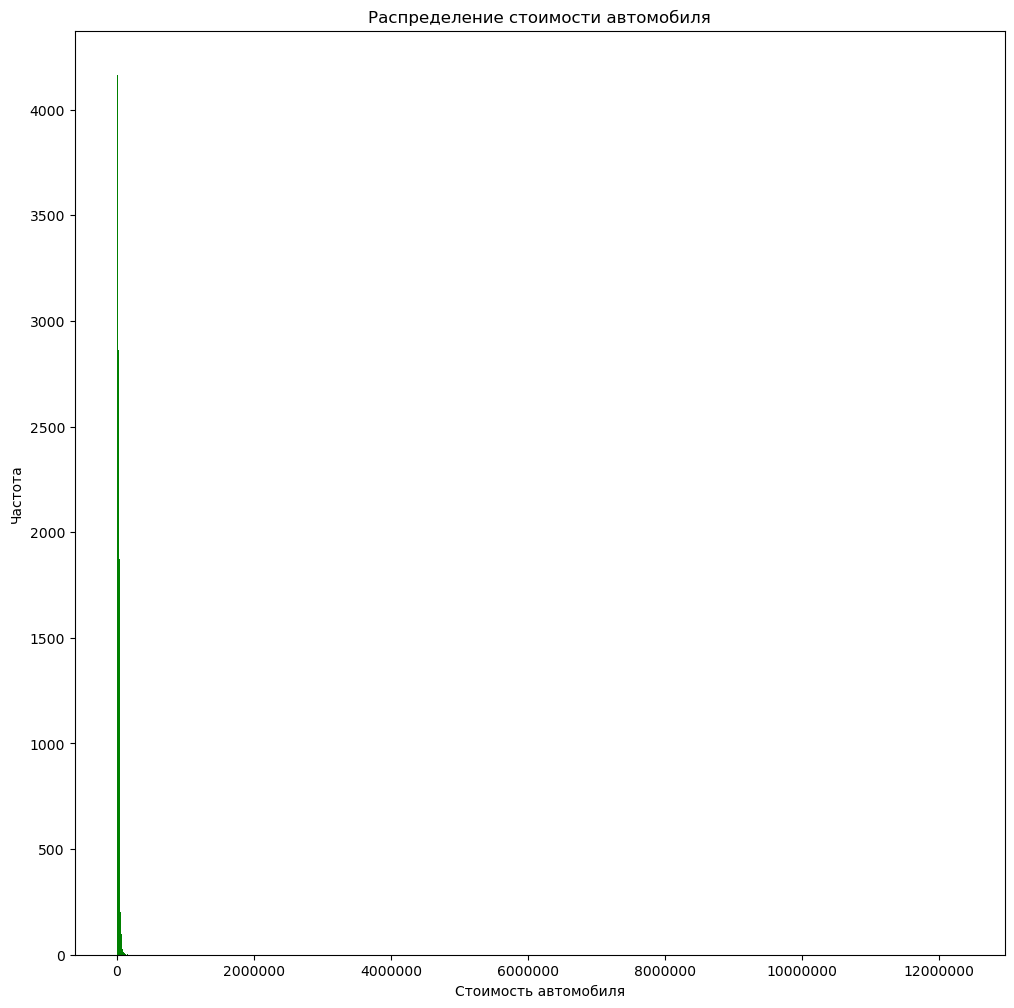

In [32]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.hist(df_clean.price, bins = 1000, color = 'g')
ax.set_xlabel('Стоимость автомобиля')
ax.set_ylabel('Частота')
ax.set_title('Распределение стоимости автомобиля')

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'));

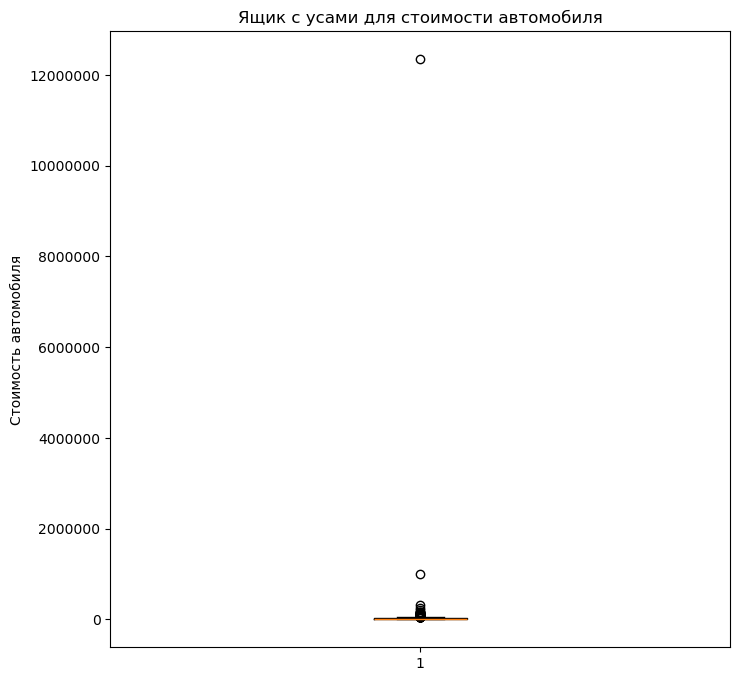

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.boxplot(df_clean.price)
ax.set_ylabel('Стоимость автомобиля')
ax.set_title('Ящик с усами для стоимости автомобиля')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

## 3. *Feature engineering*

### Преобразование категориальных данных


In [34]:
categorical = df_clean.select_dtypes(include=['object']).columns
print(categorical)

Index(['url', 'region', 'region_url', 'manufacturer', 'model', 'fuel',
       'title_status', 'transmission', 'image_url', 'description', 'state',
       'price_category'],
      dtype='object')


In [35]:
categorical_columns_for_drop = ['id', 'url','region_url','image_url', 'description']
df_prepared = df_clean.drop(columns = categorical_columns_for_drop, axis = 1)
df_prepared.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state,lat,long,posting_date,price_category,date
0,chattanooga,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,tn,35.060000,-85.250000,2021-04-17 16:30:50+00:00,high,2021-04-17 16:30:50+00:00
1,north jersey,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,nj,40.821805,-74.061962,2021-05-03 19:40:21+00:00,medium,2021-05-03 19:40:21+00:00
2,reno / tahoe,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,ca,33.779214,-84.411811,2021-04-28 10:52:20+00:00,high,2021-04-28 10:52:20+00:00
3,fayetteville,14500,2013,toyota,rav4,gas,117291,clean,automatic,nc,35.715954,-78.655304,2021-04-17 14:08:57+00:00,medium,2021-04-17 14:08:57+00:00
4,new york city,21800,2021,nissan,altima,gas,8000,clean,automatic,ny,40.654800,-73.609700,2021-05-03 22:32:06+00:00,medium,2021-05-03 22:32:06+00:00


In [36]:
df_price_category = df_prepared['price_category']
df_prepared.drop('price_category', axis=1, inplace=True)

In [37]:
categorical = df_prepared.select_dtypes(include=['object']).columns
print(categorical)

Index(['region', 'manufacturer', 'model', 'fuel', 'title_status',
       'transmission', 'state'],
      dtype='object')


In [38]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [39]:
encoded_data = ohe.fit_transform(df[categorical])

In [40]:
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical))
encoded_df

,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
df_encoded = pd.concat([df_prepared.drop(categorical, axis=1), encoded_df], axis=1)
df_encoded

,price,year,odometer,lat,long,posting_date,date,region_SF bay area,region_abilene,region_akron / canton,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,54990.0,2020.0,27442.0,35.060000,-85.250000,2021-04-17 16:30:50+00:00,2021-04-17 16:30:50+00:00,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16942.0,2016.0,60023.0,40.821805,-74.061962,2021-05-03 19:40:21+00:00,2021-05-03 19:40:21+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35590.0,2017.0,14048.0,33.779214,-84.411811,2021-04-28 10:52:20+00:00,2021-04-28 10:52:20+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14500.0,2013.0,117291.0,35.715954,-78.655304,2021-04-17 14:08:57+00:00,2021-04-17 14:08:57+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21800.0,2021.0,8000.0,40.654800,-73.609700,2021-05-03 22:32:06+00:00,2021-05-03 22:32:06+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,8995.0,2011.0,150184.0,44.925908,-122.982753,2021-04-22 19:14:01+00:00,2021-04-22 19:14:01+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,31900.0,2015.0,61943.0,43.029559,-89.397796,2021-04-14 14:14:42+00:00,2021-04-14 14:14:42+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9999,31990.0,2017.0,35921.0,36.670000,-76.300000,2021-04-24 17:50:49+00:00,2021-04-24 17:50:49+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6728,NaN,NaN,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_encoded = df_encoded.join(df_price_category, how='left')
df_encoded

,price,year,odometer,lat,long,posting_date,date,region_SF bay area,region_abilene,region_akron / canton,...,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,price_category
0,54990.0,2020.0,27442.0,35.060000,-85.250000,2021-04-17 16:30:50+00:00,2021-04-17 16:30:50+00:00,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high
1,16942.0,2016.0,60023.0,40.821805,-74.061962,2021-05-03 19:40:21+00:00,2021-05-03 19:40:21+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
2,35590.0,2017.0,14048.0,33.779214,-84.411811,2021-04-28 10:52:20+00:00,2021-04-28 10:52:20+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high
3,14500.0,2013.0,117291.0,35.715954,-78.655304,2021-04-17 14:08:57+00:00,2021-04-17 14:08:57+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
4,21800.0,2021.0,8000.0,40.654800,-73.609700,2021-05-03 22:32:06+00:00,2021-05-03 22:32:06+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,8995.0,2011.0,150184.0,44.925908,-122.982753,2021-04-22 19:14:01+00:00,2021-04-22 19:14:01+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low
9998,31900.0,2015.0,61943.0,43.029559,-89.397796,2021-04-14 14:14:42+00:00,2021-04-14 14:14:42+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,high
9999,31990.0,2017.0,35921.0,36.670000,-76.300000,2021-04-24 17:50:49+00:00,2021-04-24 17:50:49+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high
6728,NaN,NaN,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


### Новые признаки

In [43]:
df_encoded['odemeter/price'] = df_encoded.apply(lambda x: x.odometer / x.price, axis=1)
df_encoded['odemeter/price']

0        0.499036
1        3.542852
2        0.394718
3        8.089034
4        0.366972
          ...    
9997    16.696387
9998     1.941787
9999     1.122882
6728          NaN
9388          NaN
Name: odemeter/price, Length: 10000, dtype: float64

In [44]:
df_encoded['month'] = df_encoded['date'].apply(lambda x: x.month)
df_encoded['month']

0       4.0
1       5.0
2       4.0
3       4.0
4       5.0
       ... 
9997    4.0
9998    4.0
9999    4.0
6728    NaN
9388    NaN
Name: month, Length: 10000, dtype: float64

In [45]:
df_encoded['dayofweek'] = df_encoded['date'].apply(lambda x: x.day)
df_encoded['dayofweek']

0       17.0
1        3.0
2       28.0
3       17.0
4        3.0
        ... 
9997    22.0
9998    14.0
9999    24.0
6728     NaN
9388     NaN
Name: dayofweek, Length: 10000, dtype: float64

In [46]:
df_encoded['diff_years'] = df_encoded['year'] - df_encoded['date'].dt.year
df_encoded['diff_years']

0       -1.0
1       -5.0
2       -4.0
3       -8.0
4        0.0
        ... 
9997   -10.0
9998    -6.0
9999    -4.0
6728     NaN
9388     NaN
Name: diff_years, Length: 10000, dtype: float64

In [47]:
df_encoded

,price,year,odometer,lat,long,posting_date,date,region_SF bay area,region_abilene,region_akron / canton,...,state_vt,state_wa,state_wi,state_wv,state_wy,price_category,odemeter/price,month,dayofweek,diff_years
0,54990.0,2020.0,27442.0,35.060000,-85.250000,2021-04-17 16:30:50+00:00,2021-04-17 16:30:50+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,high,0.499036,4.0,17.0,-1.0
1,16942.0,2016.0,60023.0,40.821805,-74.061962,2021-05-03 19:40:21+00:00,2021-05-03 19:40:21+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,medium,3.542852,5.0,3.0,-5.0
2,35590.0,2017.0,14048.0,33.779214,-84.411811,2021-04-28 10:52:20+00:00,2021-04-28 10:52:20+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,high,0.394718,4.0,28.0,-4.0
3,14500.0,2013.0,117291.0,35.715954,-78.655304,2021-04-17 14:08:57+00:00,2021-04-17 14:08:57+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,medium,8.089034,4.0,17.0,-8.0
4,21800.0,2021.0,8000.0,40.654800,-73.609700,2021-05-03 22:32:06+00:00,2021-05-03 22:32:06+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,medium,0.366972,5.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,8995.0,2011.0,150184.0,44.925908,-122.982753,2021-04-22 19:14:01+00:00,2021-04-22 19:14:01+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,low,16.696387,4.0,22.0,-10.0
9998,31900.0,2015.0,61943.0,43.029559,-89.397796,2021-04-14 14:14:42+00:00,2021-04-14 14:14:42+00:00,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,high,1.941787,4.0,14.0,-6.0
9999,31990.0,2017.0,35921.0,36.670000,-76.300000,2021-04-24 17:50:49+00:00,2021-04-24 17:50:49+00:00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,high,1.122882,4.0,24.0,-4.0
6728,NaN,NaN,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [48]:
df_encoded = df_encoded.drop(columns=['posting_date', 'date'])
df_encoded.head()

,price,year,odometer,lat,long,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,...,state_vt,state_wa,state_wi,state_wv,state_wy,price_category,odemeter/price,month,dayofweek,diff_years
0,54990.0,2020.0,27442.0,35.060000,-85.250000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,high,0.499036,4.0,17.0,-1.0
1,16942.0,2016.0,60023.0,40.821805,-74.061962,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,medium,3.542852,5.0,3.0,-5.0
2,35590.0,2017.0,14048.0,33.779214,-84.411811,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,high,0.394718,4.0,28.0,-4.0
3,14500.0,2013.0,117291.0,35.715954,-78.655304,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,medium,8.089034,4.0,17.0,-8.0
4,21800.0,2021.0,8000.0,40.654800,-73.609700,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,medium,0.366972,5.0,3.0,0.0


### Нормализация данных

In [49]:
numerical = df_prepared.select_dtypes(include=['int64', 'float64']).columns
print(numerical)

Index(['price', 'odometer', 'lat', 'long'], dtype='object')


In [50]:
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [51]:
std_scaler.fit(df_encoded[['price', 'odometer', 'lat', 'long', 'odemeter/price']])

StandardScaler()

In [52]:
std_scaled = std_scaler.transform(df_encoded[['price', 'odometer', 'lat', 'long', 'odemeter/price']])
std_scaled

array([[ 0.27528901, -1.04268999, -0.60659823,  0.4941302 , -0.50041597],
       [-0.03000083, -0.52703995,  0.38395384,  1.11429745, -0.39130245],
       [ 0.11962714, -1.25467294, -0.82678709,  0.54059209, -0.50415554],
       ...,
       [ 0.09074143, -0.90849531, -0.32981191,  0.99024014, -0.47805258],
       [        nan,         nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan]])

In [53]:
df_encoded[['std_scaled_price', 'std_scaled_odometer', 'std_scaled_lat', 
            'std_scaled_long', 'std_scaled_odemeter/price']] = std_scaled

In [54]:
numerical_columns_for_drop = ['price', 'odometer', 'lat', 'long']
df_encoded = df_encoded.drop(columns = numerical_columns_for_drop, axis = 1)
df_encoded.head()

,year,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,...,price_category,odemeter/price,month,dayofweek,diff_years,std_scaled_price,std_scaled_odometer,std_scaled_lat,std_scaled_long,std_scaled_odemeter/price
0,2020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,high,0.499036,4.0,17.0,-1.0,0.275289,-1.042690,-0.606598,0.494130,-0.500416
1,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,medium,3.542852,5.0,3.0,-5.0,-0.030001,-0.527040,0.383954,1.114297,-0.391302
2,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,high,0.394718,4.0,28.0,-4.0,0.119627,-1.254673,-0.826787,0.540592,-0.504156
3,2013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,medium,8.089034,4.0,17.0,-8.0,-0.049595,0.379324,-0.493829,0.859683,-0.228333
4,2021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,medium,0.366972,5.0,3.0,0.0,0.008979,-1.350393,0.355243,1.139367,-0.505150


In [55]:
df_encoded = df_encoded.dropna()
df_encoded

,year,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,...,price_category,odemeter/price,month,dayofweek,diff_years,std_scaled_price,std_scaled_odometer,std_scaled_lat,std_scaled_long,std_scaled_odemeter/price
0,2020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,high,0.499036,4.0,17.0,-1.0,0.275289,-1.042690,-0.606598,0.494130,-0.500416
1,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,medium,3.542852,5.0,3.0,-5.0,-0.030001,-0.527040,0.383954,1.114297,-0.391302
2,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,high,0.394718,4.0,28.0,-4.0,0.119627,-1.254673,-0.826787,0.540592,-0.504156
3,2013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,medium,8.089034,4.0,17.0,-8.0,-0.049595,0.379324,-0.493829,0.859683,-0.228333
4,2021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,medium,0.366972,5.0,3.0,0.0,0.008979,-1.350393,0.355243,1.139367,-0.505150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,low,33.370412,4.0,10.0,-19.0,-0.129873,0.897000,0.607806,0.830071,0.677944
9996,2008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,medium,7.835323,5.0,3.0,-13.0,-0.049635,0.320480,0.795727,0.909554,-0.237428
9997,2011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,low,16.696387,4.0,22.0,-10.0,-0.093766,0.899912,1.089519,-1.597445,0.080220
9998,2015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,high,1.941787,4.0,14.0,-6.0,0.090019,-0.496653,0.763504,0.264213,-0.448697


## 4. *Modelling*

### Подготовка данных к машинному обучению

In [56]:
df_new = df_encoded.copy()

In [57]:
df_new = df_new.drop(['std_scaled_price', 'std_scaled_odemeter/price'], axis=1)

x = df_new.drop(['price_category'], axis=1)
y = df_new['price_category']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Тестирование модели Случайный лес

In [59]:
rf_clf = RandomForestClassifier()

In [60]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [61]:
predicted_train_rf = rf_clf.predict(x_train)
predicted_test_rf = rf_clf.predict(x_test)

In [62]:
print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))

1.0
0.8536666666666667


### Тестирование модели Логистическая регрессия

In [63]:
logreg = LogisticRegression(max_iter=1000, solver='liblinear', C=3)

In [64]:
logreg.fit(x_train, y_train)

LogisticRegression(C=3, max_iter=1000, solver='liblinear')

In [65]:
predict_train_log = logreg.predict(x_train)
print(accuracy_score(y_train, predict_train_log))

0.9809945698771078


In [66]:
logreg_pred = logreg.predict(x_test)
print(accuracy_score(y_test, logreg_pred))

0.9466666666666667


### Тестирование модели Многослойный персептрон

In [68]:
mlp = MLPClassifier(random_state=42, max_iter=500)

In [69]:
mlp.fit(x_train, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [70]:
mlp_pred = mlp.predict(x_test)
print(accuracy_score(y_test, mlp_pred))

0.8823333333333333


In [73]:
mlp_tuned = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 20), activation = 'tanh')
mlp_tuned.fit(x_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 20), max_iter=1000,
              random_state=42)

In [74]:
mlp_pred_tuned = mlp_tuned.predict(x_test)
print(accuracy_score(y_test, mlp_pred_tuned))

0.913


### Переобучение и оценка результатов моделирования

In [83]:
for model in [rf_clf, mlp_tuned, logreg]:
    cv_score = cross_val_score(model, x, y, cv=5)
    print(f'model: {type(model).__name__}, cv_score_mean: {cv_score.mean():.4f}, cv_score_std: {cv_score.std():.4f}')

model: RandomForestClassifier, cv_score_mean: 0.8516, cv_score_std: 0.0071
model: MLPClassifier, cv_score_mean: 0.9020, cv_score_std: 0.0238
model: LogisticRegression, cv_score_mean: 0.9476, cv_score_std: 0.0056


## 5. *Results*

In [84]:
##### По результатам моделирования наилучший результат показала модель Логистическая регрессия

In [85]:
logreg.fit(x, y)

LogisticRegression(C=3, max_iter=1000, solver='liblinear')

In [87]:
filename = 'model.pickle'

with open(filename, 'wb') as file:
    pickle.dump(logreg, file)